In [1]:
import pandas as pd # importando o pandas para manipularmos o dataset
import numpy as np # biblioteca para manipulação de vetores e matrizes grandes além de outras manipulações de dados de larga escala
import seaborn as sns # importando o Seaborn para visualizar o comportamento dos dados
import matplotlib.cm as mcm # biblioteca para mostrar gráficos (espeficamente uma parte para cores)
import matplotlib.pyplot as plt # importando o Matplotlib para o elbow method
import pandas_profiling

from pandas_profiling import ProfileReport # importando o pandas-profiling para fazer o profile do dataset
from sklearn.model_selection import train_test_split # utilizado para o split entre treinamento e teste
from sklearn.neighbors import KNeighborsRegressor # KNN para regressão
from sklearn.linear_model import LinearRegression # Regressão linear
from sklearn.svm import SVR # SVM para regressão
from sklearn.decomposition import PCA # PCA como aprendizagem não-supervisionada
from sklearn.preprocessing import RobustScaler # utilizado para que todas as entradas estejam na mesma escala numérica
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import * # importando todas as funções específicas de seleção de atributos do scikit-learn
from sklearn.decomposition import * # importando todas as funções específicas para a extração de atributos do scikit-learn
from sklearn.cluster import * # importando todas as funções específicas para o agrupamento

In [2]:
#seleção do dataset
df_nba = pd.read_csv('/content/nba_stats.csv') #carrega o dataset do diretorio 
df_nba.describe() #mostra destacaria os dados
#display(df_nba.columns)

,Ano,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,WinShares,FieldGoals,FieldGoalAttempts,...,TwoPointFieldGoals,TwoPointFieldGoalAttempts,TwoPointFieldGoalPercentage,EffectiveFieldGoalPercentage,FreeThrows,FreeThrowAttempts,FreeThrowPercentage,Assists,PersonalFouls,Points
count,24624.000000,24616.000000,24624.000000,24538.000000,24525.000000,24585.000000,24585.000000,24585.000000,24624.000000,24624.000000,...,24624.000000,24624.000000,24496.000000,24525.000000,24624.000000,24624.000000,23766.000000,24624.000000,24624.000000,24624.000000
mean,1992.594989,26.664405,50.837110,0.493001,0.325455,1.257307,1.227395,2.485796,195.325820,430.645752,...,178.250447,381.756782,0.445343,0.450658,102.389336,136.775219,0.719279,114.852623,116.339222,510.116350
std,17.429594,3.841892,26.496161,0.094469,0.218971,2.136256,1.269613,3.058638,188.114361,397.624715,...,179.478923,371.260335,0.099803,0.099200,113.373565,146.078918,0.141824,135.863913,84.791873,492.922981
min,1950.000000,18.000000,1.000000,0.000000,0.000000,-5.100000,-1.000000,-2.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,24.000000,27.000000,0.458000,0.208000,-0.100000,0.200000,0.200000,41.000000,99.000000,...,35.000000,82.000000,0.407000,0.414000,18.000000,27.000000,0.657000,19.000000,39.000000,106.000000
50%,1996.000000,26.000000,58.000000,0.506000,0.296000,0.400000,0.800000,1.400000,141.000000,321.000000,...,122.000000,270.000000,0.456000,0.463000,63.000000,88.000000,0.743000,68.000000,109.000000,364.000000
75%,2007.000000,29.000000,75.000000,0.544000,0.400000,1.900000,1.800000,3.800000,299.000000,661.000000,...,268.000000,579.250000,0.496000,0.501000,149.000000,201.000000,0.808000,160.000000,182.000000,778.000000
max,2017.000000,44.000000,88.000000,1.136000,6.000000,18.300000,16.000000,25.400000,1597.000000,3159.000000,...,1597.000000,3159.000000,1.000000,1.500000,840.000000,1363.000000,1.000000,1164.000000,386.000000,4029.000000


In [3]:
df_nba

,Ano,Posicao,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,WinShares,FieldGoals,...,TwoPointFieldGoals,TwoPointFieldGoalAttempts,TwoPointFieldGoalPercentage,EffectiveFieldGoalPercentage,FreeThrows,FreeThrowAttempts,FreeThrowPercentage,Assists,PersonalFouls,Points
0,1950,G-F,31.0,63,0.368,0.467,-0.1,3.6,3.5,144,...,144,516,0.279,0.279,170,241,0.705,176,217,458
1,1950,SG,29.0,49,0.435,0.387,1.6,0.6,2.2,102,...,102,274,0.372,0.372,75,106,0.708,109,99,279
2,1950,SF,25.0,67,0.394,0.259,0.9,2.8,3.6,174,...,174,499,0.349,0.349,90,129,0.698,140,192,438
3,1950,F,24.0,15,0.312,0.395,-0.5,-0.1,-0.6,22,...,22,86,0.256,0.256,19,34,0.559,20,29,63
4,1950,F,24.0,13,0.308,0.378,-0.5,-0.1,-0.6,21,...,21,82,0.256,0.256,17,31,0.548,20,27,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24619,2017,PF,24.0,62,0.604,0.442,3.4,2.2,5.6,253,...,253,442,0.572,0.571,133,196,0.679,99,189,639
24620,2017,C,27.0,51,0.508,0.247,0.5,0.6,1.0,78,...,78,157,0.497,0.494,22,39,0.564,42,61,178
24621,2017,C,20.0,19,0.346,0.161,-0.1,0.1,0.0,10,...,10,31,0.323,0.323,3,5,0.600,4,17,23
24622,2017,SF,22.0,44,0.503,0.181,-0.3,0.8,0.5,88,...,55,122,0.451,0.473,31,40,0.775,36,78,240


In [4]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           24624 non-null  int64  
 1   Posicao                       24624 non-null  object 
 2   Idade                         24616 non-null  float64
 3   Jogos                         24624 non-null  int64  
 4   TrueShootingPercentage        24538 non-null  float64
 5   FreeThrowRate                 24525 non-null  float64
 6   OffensiveWinShares            24585 non-null  float64
 7   DefensiveWinShares            24585 non-null  float64
 8   WinShares                     24585 non-null  float64
 9   FieldGoals                    24624 non-null  int64  
 10  FieldGoalAttempts             24624 non-null  int64  
 11  FieldGoalPercentage           24525 non-null  float64
 12  TwoPointFieldGoals            24624 non-null  int64  
 13  T

In [5]:
for col in df_nba.columns:
 if df_nba[col].isnull().sum():
  total_null=df_nba[col].isnull().sum() 
  print('Column: {} total null {}, i.e. {} %'.format(col,total_null,round(total_null*100/len(df_nba),2)))

Column: Idade total null 8, i.e. 0.03 %
Column: TrueShootingPercentage total null 86, i.e. 0.35 %
Column: FreeThrowRate total null 99, i.e. 0.4 %
Column: OffensiveWinShares total null 39, i.e. 0.16 %
Column: DefensiveWinShares total null 39, i.e. 0.16 %
Column: WinShares total null 39, i.e. 0.16 %
Column: FieldGoalPercentage total null 99, i.e. 0.4 %
Column: TwoPointFieldGoalPercentage total null 128, i.e. 0.52 %
Column: EffectiveFieldGoalPercentage total null 99, i.e. 0.4 %
Column: FreeThrowPercentage total null 858, i.e. 3.48 %


In [6]:
#Limpando dados nulos
df_nba.isnull().sum()
df_nba.dropna(inplace = True)
df_nba.isnull().sum()

Ano                             0
Posicao                         0
Idade                           0
Jogos                           0
TrueShootingPercentage          0
FreeThrowRate                   0
OffensiveWinShares              0
DefensiveWinShares              0
WinShares                       0
FieldGoals                      0
FieldGoalAttempts               0
FieldGoalPercentage             0
TwoPointFieldGoals              0
TwoPointFieldGoalAttempts       0
TwoPointFieldGoalPercentage     0
EffectiveFieldGoalPercentage    0
FreeThrows                      0
FreeThrowAttempts               0
FreeThrowPercentage             0
Assists                         0
PersonalFouls                   0
Points                          0
dtype: int64

In [8]:
df_nba.head()

,Ano,Posicao,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,WinShares,FieldGoals,...,TwoPointFieldGoals,TwoPointFieldGoalAttempts,TwoPointFieldGoalPercentage,EffectiveFieldGoalPercentage,FreeThrows,FreeThrowAttempts,FreeThrowPercentage,Assists,PersonalFouls,Points
0,1950,G-F,31.0,63,0.368,0.467,-0.1,3.6,3.5,144,...,144,516,0.279,0.279,170,241,0.705,176,217,458
1,1950,SG,29.0,49,0.435,0.387,1.6,0.6,2.2,102,...,102,274,0.372,0.372,75,106,0.708,109,99,279
2,1950,SF,25.0,67,0.394,0.259,0.9,2.8,3.6,174,...,174,499,0.349,0.349,90,129,0.698,140,192,438
3,1950,F,24.0,15,0.312,0.395,-0.5,-0.1,-0.6,22,...,22,86,0.256,0.256,19,34,0.559,20,29,63
4,1950,F,24.0,13,0.308,0.378,-0.5,-0.1,-0.6,21,...,21,82,0.256,0.256,17,31,0.548,20,27,59


In [9]:
#Substitui String para Float 
df_nba['Posicao'] = df_nba['Posicao'].replace({'PF':1, 'SG':2, 'C':3, 'SF':4, 'PG':5, 'G':6, 'F-C':6, 'G-F':6, 'F-G':6, 'C-F':6, 'C-PF':6, 'SG-SF':6, 'F':6, 'PF-C':6, 'SG-PG':6, 'SF-SG':6, 'PG-SG':6,         
                                               'PF-SF':6, 'SF-PF':6, 'SG-PF':6, 'C-SF':6, 'SF-PG':6, 'PG-SF':6}) 

In [10]:
#transforma os dados da variavel em porcentagem 
df_nba['TrueShootingPercentage'] = df_nba['TrueShootingPercentage'] = 100
df_nba['FieldGoalPercentage'] = df_nba['FieldGoalPercentage'] = 100
df_nba['TwoPointFieldGoalPercentage'] = df_nba['TwoPointFieldGoalPercentage'] = 100
df_nba['EffectiveFieldGoalPercentage'] = df_nba['EffectiveFieldGoalPercentage'] = 100
df_nba['FreeThrowPercentage'] = df_nba['FreeThrowPercentage'] = 100

df_nba.head(n=2)

,Ano,Posicao,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,WinShares,FieldGoals,...,TwoPointFieldGoals,TwoPointFieldGoalAttempts,TwoPointFieldGoalPercentage,EffectiveFieldGoalPercentage,FreeThrows,FreeThrowAttempts,FreeThrowPercentage,Assists,PersonalFouls,Points
0,1950,6,31.0,63,100,0.467,-0.1,3.6,3.5,144,...,144,516,100,100,170,241,100,176,217,458
1,1950,2,29.0,49,100,0.387,1.6,0.6,2.2,102,...,102,274,100,100,75,106,100,109,99,279


In [28]:
#Gera relatórios de perfil de um dataset
profile = ProfileReport(df_nba)
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:426: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sns.pairplot(df_nba, hue='WinShares') # criando o pairplot

#Sem o scaler
#Divisão entre treino e teste

In [11]:
# split entre treinamento e teste
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(df_nba.drop('WinShares', axis=1), # aqui informamos os atributos
                                                                        df_nba['WinShares'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                        test_size=0.25, # informamos a porcentagem de divisão da base. Geralmente é algo entre 25% (0.25) a 35% (0.35)
                                                                        random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que alguns algoritmos i

#Treinamento do modelo

In [12]:
modelo_knn = KNeighborsRegressor().fit(X_train_win, y_train_win)
modelo_knn.score(X_test_win, y_test_win)

0.828845007956632

In [13]:
modelo_lr = LinearRegression().fit(X_train_win, y_train_win)
modelo_lr.score(X_test_win, y_test_win)

0.9997311390486573

In [14]:
modelo_svm = SVR().fit(X_train_win, y_train_win)
modelo_svm.score(X_test_win, y_test_win)

0.8477968673368719

#Com o scaler
## Divisão entre treino e teste

In [15]:
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(RobustScaler().fit_transform(df_nba.drop('WinShares', axis=1)), # aqui informamos os atributos
                                                                        df_nba['WinShares'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                        test_size=0.25, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                        random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que a

#Treinamento do modelo

In [16]:
modelo_knn = KNeighborsRegressor().fit(X_train_win, y_train_win)
modelo_knn.score(X_test_win, y_test_win)

0.9750874244238676

In [17]:
modelo_lr = LinearRegression().fit(X_train_win, y_train_win)
modelo_lr.score(X_test_win, y_test_win)

0.9997311390486573

In [18]:
modelo_svm = SVR().fit(X_train_win, y_train_win)
modelo_svm.score(X_test_win, y_test_win)

0.9864654809522835

#PCA

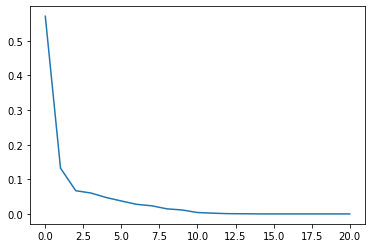

In [19]:
pca = PCA().fit(RobustScaler().fit_transform(df_nba.drop('WinShares', axis=1)))
plt.plot(pca.explained_variance_ratio_)

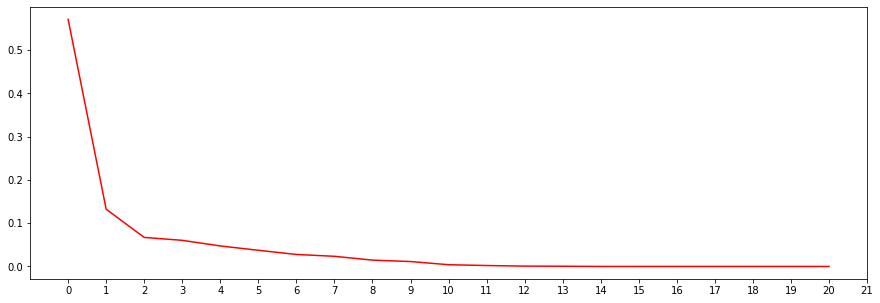

In [20]:
plt.figure(figsize=(15, 5)) # criando um gráfico retangular para facilitar a visualização
plt.plot(pca.explained_variance_ratio_, color='r') # colocando a porcentagem de variância que cada componente nos trouxe
plt.xticks(np.arange(df_nba.shape[1])) # mostrando todos os números no eixo x
plt.show() # mostrando o gráfico final

In [21]:
# split entre treinamento e teste
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(PCA(n_components=5).fit_transform(RobustScaler().fit_transform(df_nba.drop('WinShares', axis=1))), # aqui informamos os atributos
                                                                        df_nba['WinShares'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                        test_size=0.25, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                        random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que a

In [22]:
modelo_knn = KNeighborsRegressor().fit(X_train_win, y_train_win)
modelo_knn.score(X_test_win, y_test_win)

0.8932569172551568

In [23]:
modelo_lr = LinearRegression().fit(X_train_win, y_train_win)
modelo_lr.score(X_test_win, y_test_win)

0.8880476911305923

In [24]:
modelo_svm = SVR().fit(X_train_win, y_train_win)
modelo_svm.score(X_test_win, y_test_win)

0.8997008122874657

Mostrando as previsões

In [25]:
modelo_knn.predict(X_test_win)

array([ 5.55111512e-18, -8.00000000e-02,  3.40000000e-01, ...,
        6.20000000e-01,  4.00000000e-01,  1.86000000e+00])

In [26]:
df_test = pd.DataFrame(X_test_win) #pd.DataFrame(X_test_wine, columns=df_wine.drop('quality', axis=1).columns)
df_test['Quality_Real'] = y_test_win.values
df_test['Quality_Predicao_KNN'] = modelo_knn.predict(X_test_win)
df_test['Quality_Predicao_Linear'] = modelo_lr.predict(X_test_win)
df_test['Quality_Predicao_SVM'] = modelo_svm.predict(X_test_win)
df_test

,0,1,2,3,4,Quality_Real,Quality_Predicao_KNN,Quality_Predicao_Linear,Quality_Predicao_SVM
0,-2.117126,-0.874222,0.186870,-0.764615,0.025153,0.5,5.551115e-18,-0.538810,0.007975
1,-2.305383,0.673148,-0.171576,-0.905970,-0.918590,0.4,-8.000000e-02,0.085058,0.138565
2,-2.385732,-0.552144,-1.041128,-0.259279,-1.181580,0.2,3.400000e-01,0.350915,0.183942
3,-1.533719,-1.491441,0.778463,0.282666,-0.039933,0.4,1.800000e-01,0.754475,0.698807
4,-1.924120,1.307344,0.121450,-0.515957,0.371408,0.6,4.800000e-01,0.007444,0.392589
...,...,...,...,...,...,...,...,...,...
5920,-2.410480,1.745709,1.316075,-1.431207,0.795953,-0.1,2.000000e-02,-1.336528,0.083354
5921,-0.234549,-0.192896,-0.702617,-0.628108,-0.779030,3.4,1.400000e+00,2.383732,2.174728
5922,-1.659678,3.763660,0.378865,0.468428,-0.149689,1.3,6.200000e-01,1.770196,1.198616
5923,-0.174616,-1.304785,-1.235419,-0.604098,0.339653,2.2,4.000000e-01,1.478644,1.243771
